In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series(['a',3,np.nan,1,np.nan])

In [4]:
print(s.notnull().sum())

3


In [8]:
s = pd.Series([np.nan,1,2,np.nan,3])
s = s.ffill()

In [9]:
print(s)

0    NaN
1    1.0
2    2.0
3    2.0
4    3.0
dtype: float64


In [10]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94, 60.655, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI':[
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Contient': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population','GDP','Surface Area','HDI','Continent'])

In [11]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,NaN
1,63.951,2833687,640679,0.888,NaN
2,80.940,3874437,357114,0.916,NaN
3,60.655,2167744,301336,0.873,NaN
4,127.061,4602367,377930,0.891,NaN
5,64.511,2950039,242495,0.907,NaN
6,318.523,17348075,9525067,0.915,NaN


In [13]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [14]:
s.duplicated()

0    False
1    False
2    False
3     True
4    False
dtype: bool

## Missing Data: NaN|inf

In [1]:
falsy_values = (0, False, None, '', [],{})

In [2]:
any(falsy_values)

False

Python will treat any of the above as 'falsy' values, but numpy only cares about NaN values

In [8]:
np.nan

nan

In [9]:
3+np.nan

nan

In [10]:
a=np.array([1,2,3, np.nan, np.nan, 4]) 

In [11]:
a.sum()

nan

NaN is a contagion, everything it touches will become NaN.

In [12]:
a.mean()

nan

In [13]:
3 + None
#Nones will throw an error.

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [16]:
a = np.array([1,2,3,np.nan,None,4], dtype='float')

In [17]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

Nones will automatically become NaN in an array w/ a  type.

In [18]:
a.mean()

nan

In [20]:
np.inf

inf

In [21]:
3 + np.inf

inf

Similarly behaves as a contagion.

In [23]:
1/np.inf

0.0

In [24]:
np.inf/np.inf

nan

In [40]:
b=np.array([1,2,3,np.inf,np.nan,4], dtype="float")

In [42]:
b.sum()

nan

### Checking for NaN|inf

In [30]:
np.isnan(np.nan)

True

In [31]:
np.isinf(np.inf)

True

In [32]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

A Joint operation can be performed, forming a tuple /w two boolean results

In [33]:
np.isnan(a)

array([False, False, False,  True,  True, False])

In [34]:
np.isnan(b)

array([False, False, False, False,  True, False])

In [37]:
np.isfinite(a)

array([ True,  True,  True, False, False,  True])

In [43]:
np.isfinite(b)

array([ True,  True,  True, False, False,  True])

### Filtering the NaN|inf

In [45]:
a = np.array([1,2,3,np.nan,np.nan,4])

In [46]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [47]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

Find the values in a that are not NaN, returning those values. IMPACTS ORDER

In [48]:
a[np.isfinite(a)].sum()

10.0

In [49]:
a[np.isfinite(a)].mean()

2.5

## Missing Data w/ Pandas

In [53]:
pd.isnull(np.nan)

True

In [54]:
pd.isnull(None)

True

In [55]:
pd.isna(None)

True

In [56]:
pd.notnull(None)

False

In [57]:
pd.notnull(np.nan)

False

In [58]:
pd.notna(np.nan)

False

In [59]:
pd.notna(3)

True

In [60]:
pd.isnull(pd.Series([1,np.nan,7]))

0    False
1     True
2    False
dtype: bool

In [61]:
pd.notnull(pd.Series([1,np.nan,7]))

0     True
1    False
2     True
dtype: bool

In [62]:
pd.isnull(pd.DataFrame({
    'Column A': [1,np.nan,7],
    'Column B': [np.nan,2,3],
    'Column C': [np.nan,2,np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [63]:
pd.Series([1,2,np.nan]).count()

2

Unlike numpy, Pandas is not so thrown by NaN. It will process the finite numbers and skip the NaN.

In [64]:
pd.Series([1,2,np.nan]).sum()

3.0

In [65]:
pd.Series([1,2,np.nan]).mean()

1.5

In [66]:
s=pd.Series([1,2,3,np.nan,np.nan,4])

In [67]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [68]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [69]:
pd.notnull(s).sum()

4

pd.isnull(s).sum()

Above sum the number for Trues!

In [71]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

INDEX REMAINS!

In [72]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [73]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [75]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [76]:
s[s.isna()]

3   NaN
4   NaN
dtype: float64

### Dropping Nulls

In [78]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [79]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

INDEX REMAINS!

In [82]:
df=pd.DataFrame({
    'Column A': [1,np.nan,30,np.nan],
    'Column B': [2,8,31,np.nan],
    'Column C': [np.nan,9,32,100],
    'Column D': [5,8,34,110]
})

In [83]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [84]:
df.shape

(4, 4)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 260.0 bytes


In [86]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [87]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [90]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


Default Dropna behavior will drop ANY row with 1+ NaN

In [91]:
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


Setting axis n. will drop all nulls in that axis

In [93]:
df2 = pd.DataFrame({
    'Column A': [1,np.nan,30],
    'Column B': [2,np.nan,31],
    'Column C': [np.nan,np.nan,100]
})

In [94]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [96]:
df2.dropna(how='all')

,Column A,Column B,Column C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


Sets a requirement that the entire row is NaN in order to drop.

In [98]:
df2.dropna(how='any')

,Column A,Column B,Column C
2,30.0,31.0,100.0


In [99]:
df2.dropna(thresh=2)

,Column A,Column B,Column C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


In [100]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [104]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


### Finding Nulls

In [106]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [107]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [108]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [115]:
s.fillna(method='ffill')

C:\Users\Chris\AppData\Local\Temp\ipykernel_6940\1029756637.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.fillna(method='ffill')


0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [116]:
s.ffill()

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [117]:
s.fillna(method='bfill')

C:\Users\Chris\AppData\Local\Temp\ipykernel_6940\1641295691.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.fillna(method='bfill')


0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [118]:
s.bfill()

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [120]:
pd.Series([np.nan,3,np.nan,9]).ffill()

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [121]:
pd.Series([1,np.nan,3,np.nan,np.nan]).bfill()

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

Carefully ensure when using `ffill` and `bfill` that the first|last values are not NaN themselves.

In [123]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [125]:
df.fillna({'Column A': 0,'Column B': 99,'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


Different columns can be filled with differing methods

In [128]:
df.ffill(axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [129]:
df.ffill(axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


### Checking for NA

In [131]:
s.dropna().count()

4

In [135]:
missing_values = len(s.dropna()) !=len(s)
missing_values

True

In [136]:
len(s)

6

In [137]:
s.count()

4

In [139]:
missing_values = s.count() !=len(s)
missing_values

True

Python methods can also be usefully utilized.

In [140]:
pd.Series([True,False,False]).any()

True

In [141]:
pd.Series([True,False,False]).all()

False

In [142]:
pd.Series([True,True,True]).all()

True

In [143]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [144]:
pd.Series([1,np.nan]).isnull().any()

True

In [145]:
pd.Series([1,2]).isnull().any()

False

In [146]:
s.isnull().any()

True

In [147]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [148]:
s.isnull().values.any()

True

In [14]:
df = pd.DataFrame({
    'Sex': ['M','F','F','D','?'],
    'Age': [29,30,24,290,25]
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [4]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [5]:
df['Sex'].value_counts()

Sex
F    2
M    1
D    1
?    1
Name: count, dtype: int64

In [6]:
df['Sex'].replace('D','F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [7]:
df['Sex'].replace({'D':'F','N':'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [9]:
df.replace({
    'Sex': {
        'D':'F',
        'N':'M'
    },
    'Age': {
        290:29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [10]:
df[df['Age']>100]

,Sex,Age
3,D,290


In [16]:
df.loc[df['Age']>100,'Age']=df.loc[df['Age']>100,'Age']/10

In [17]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,29
4,?,25


### Duplicates

In [19]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany'
],index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth'
])

In [21]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [22]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [23]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [25]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [26]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [27]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [28]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicates in DataFrames

In [30]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant'
    ],
    'Pos':[
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [31]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [32]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

DataFrames default to data in every column being duplicates.

In [33]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [34]:
players.duplicated(subset=['Name'],keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [35]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [36]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [37]:
players.drop_duplicates(subset=['Name'],keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


### Text Handling

In [39]:
df = pd.DataFrame({
    'Data':[
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_  IT_1',
        '1985_F_I  T_2'
    ]})

The Data has a few repeat discrepencies, but the order and quantity of them can vary line to line.

In [40]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [41]:
df['Data'].str.split('_')

0      [1987, M, US , 1]
1      [1990?, M, UK, 1]
2       [1992, F, US, 2]
3    [1970?, M,   IT, 1]
4     [1985, F, I  T, 2]
Name: Data, dtype: object

In [45]:
df = df['Data'].str.split('_', expand=True)

In [46]:
df.columns=['Year','Sex','Country','No. Children']

In [61]:
df

,Year,Sex,Country,No. Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [51]:
df['Year'].str.contains('\?')

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\Chris\AppData\Local\Temp\ipykernel_15388\681321257.py:1: SyntaxWarning: invalid escape sequence '\?'
  df['Year'].str.contains('\?')


0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [53]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [57]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [58]:
df['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [64]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'), regex=True)

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [66]:
%matplotlib inline

In [5]:
x = np.arange(-10,11)

In [69]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Nice plot of x')

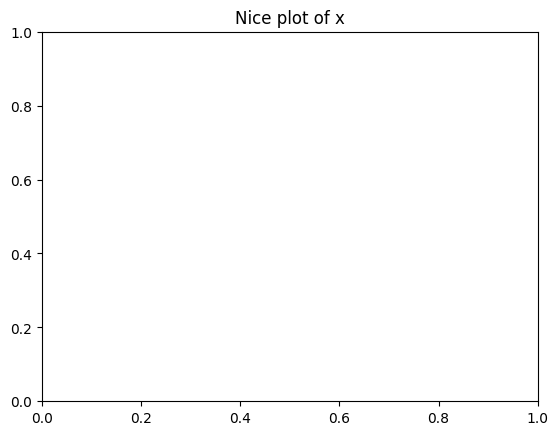

In [70]:
plt.title('Nice plot of x')

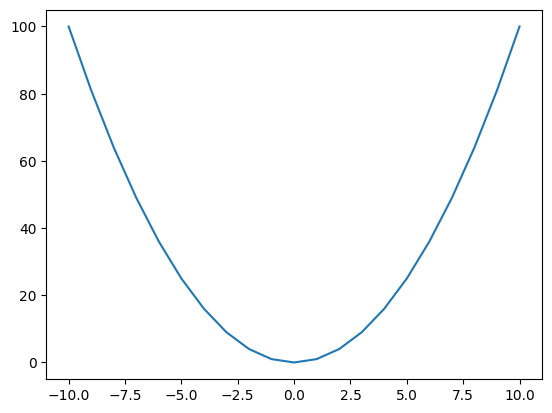

In [71]:
plt.plot(x, x**2)

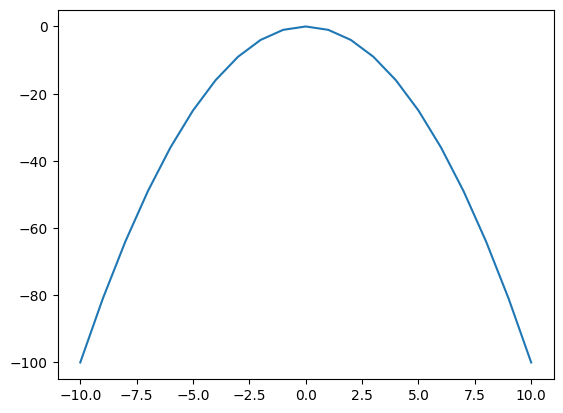

In [72]:
plt.plot(x,-1*(x**2))

Text(0, 0.5, 'X Squared')

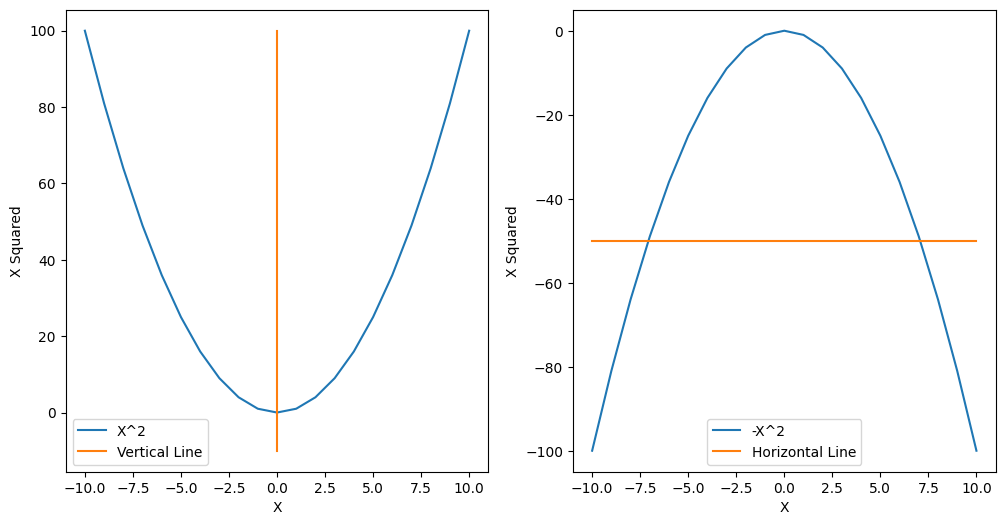

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,x**2)
plt.plot([0,0,0],[-10,0,100])
plt.legend(['X^2','Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1,2,2)
plt.plot(x,-1*(x**2))
plt.plot([-10,0,10],[-50,-50,-50])
plt.legend(['-X^2','Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

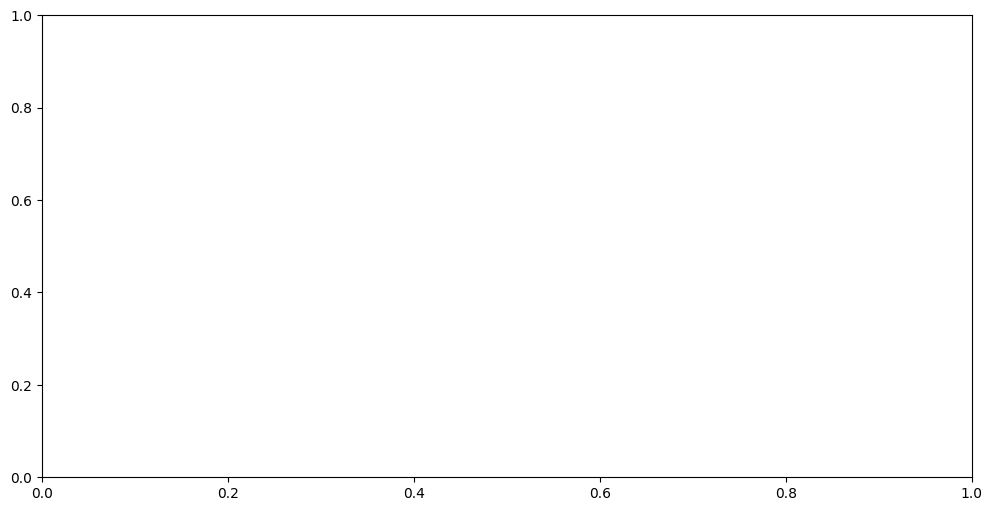

In [84]:
fig, axes = plt.subplots(figsize=(12,6))

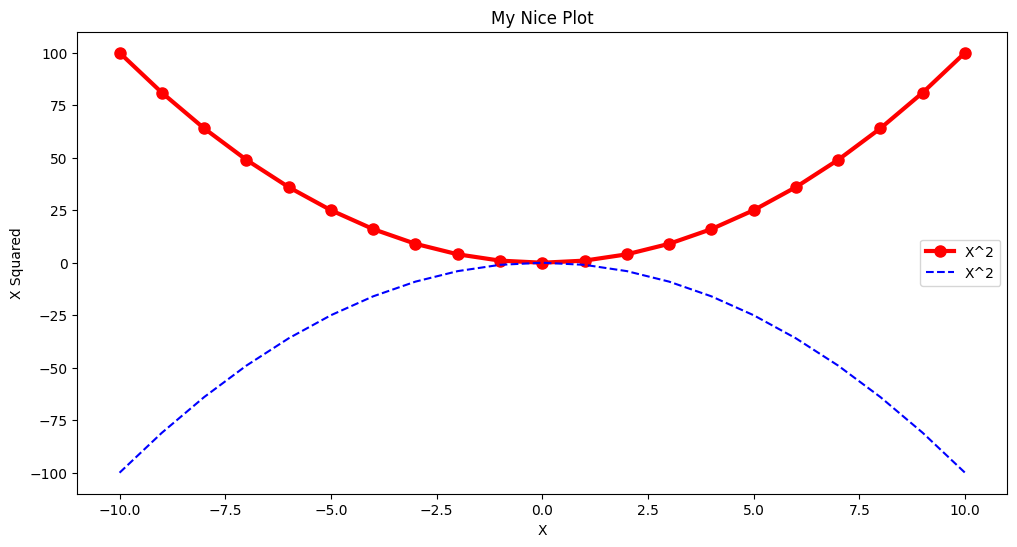

In [6]:
axes.plot(
    x, (x**2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x,-1*(x**2),'b--',label='X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title('My Nice Plot')

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

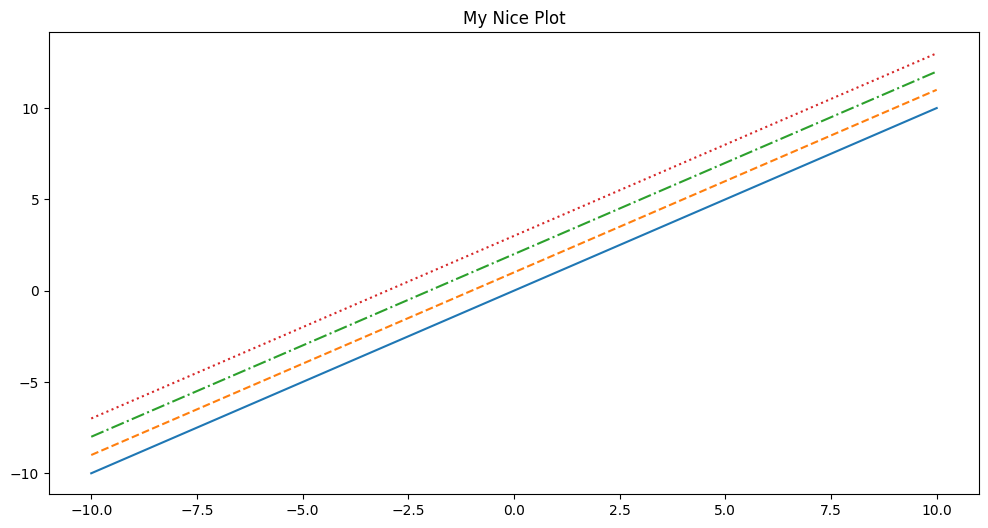

In [88]:
fig,axes=plt.subplots(figsize=(12,6))

axes.plot(x,x+0,linestyle='solid')
axes.plot(x,x+1,linestyle='dashed')
axes.plot(x,x+2,linestyle='dashdot')
axes.plot(x,x+3,linestyle='dotted')

axes.set_title('My Nice Plot')

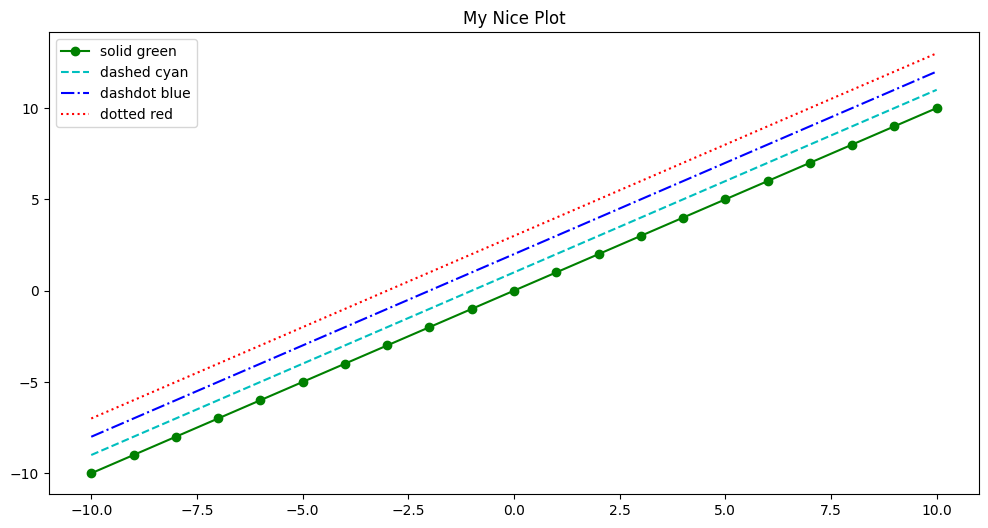

In [7]:
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(x,x+0,'-og',label='solid green')
axes.plot(x,x+1,'--c',label='dashed cyan')
axes.plot(x,x+2,'-.b',label='dashdot blue')
axes.plot(x,x+3,':r',label='dotted red')

axes.set_title('My Nice Plot')

axes.legend()

In [9]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']


In [11]:
linestyles = ['_','-','--',':']
print('Line Styles: {}'.format(linestyles))

Line Styles: ['_', '-', '--', ':']


### Other Plot Types

(<Figure size 640x480 with 1 Axes>, <Axes: >)

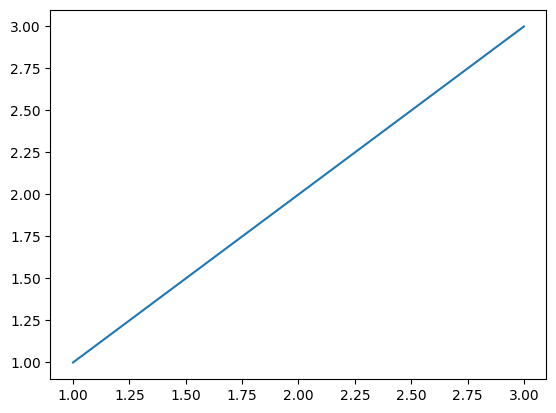

In [18]:
plot_objects = plt.subplots()
fig, ax = plot_objects
ax.plot([1,2,3],[1,2,3])
# Coordinates of Points
plot_objects

(<Figure size 1400x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

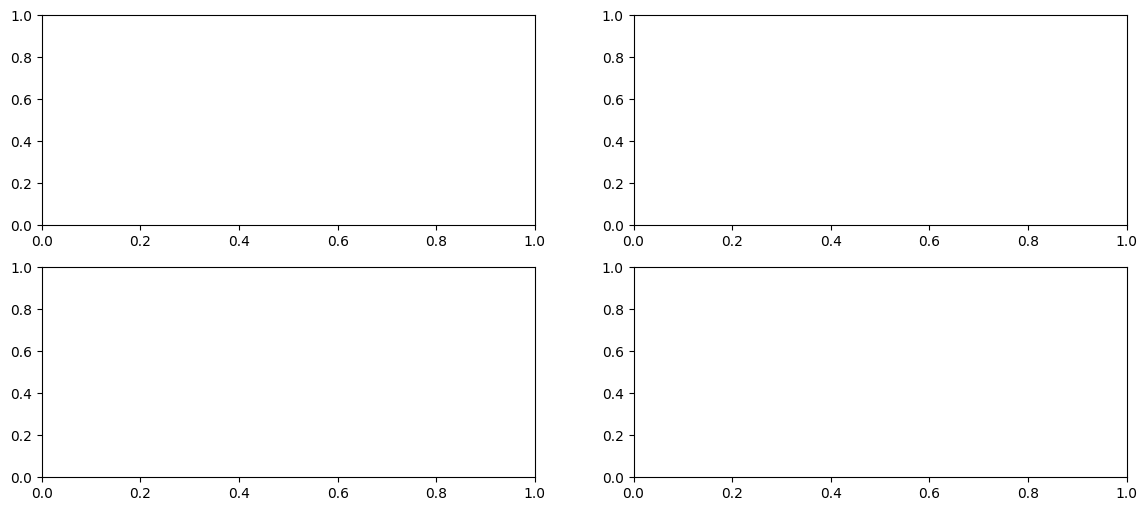

In [29]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig,((ax1,ax2),(ax3,ax4)) = plot_objects
plot_objects

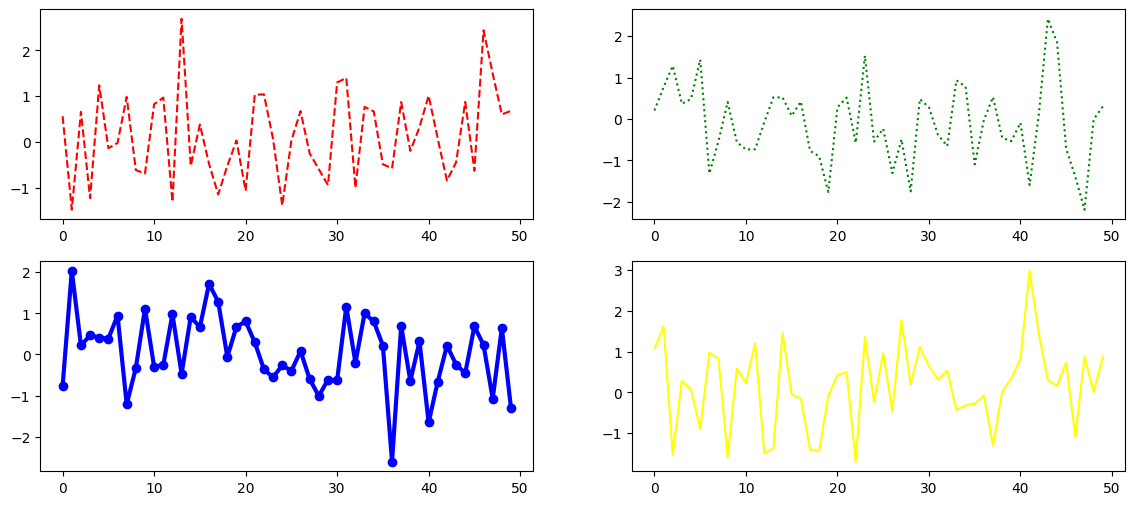

In [30]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

fig

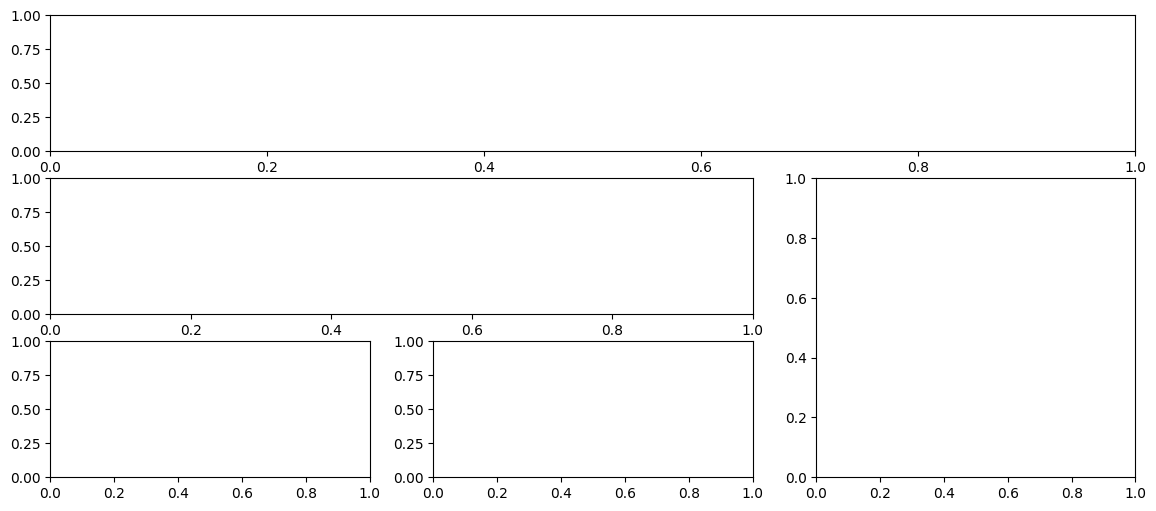

In [35]:
plt.figure(figsize=(14,6))

#Top
ax1=plt.subplot2grid((3,3), (0,0), colspan=3)
#Mid Left
ax2=plt.subplot2grid((3,3), (1,0), colspan=2)
#Bottom Right
ax3=plt.subplot2grid((3,3), (1,2), rowspan=2)
#Bottom Left
ax4=plt.subplot2grid((3,3), (2,0))
#Bottom Mid
ax5=plt.subplot2grid((3,3), (2,1))

### Scatter Plots

In [37]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi*(20*np.random.rand(N))**2 # 0-15 radii

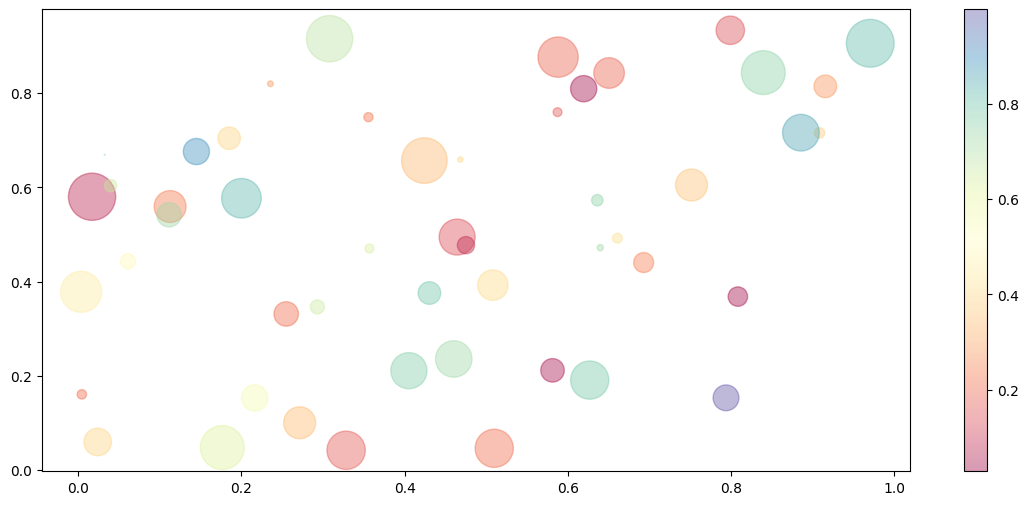

In [39]:
plt.figure(figsize=(14,6))

plt.scatter(x,y,s=area,c=colors, alpha=0.4, cmap='Spectral')
plt.colorbar()

plt.show()

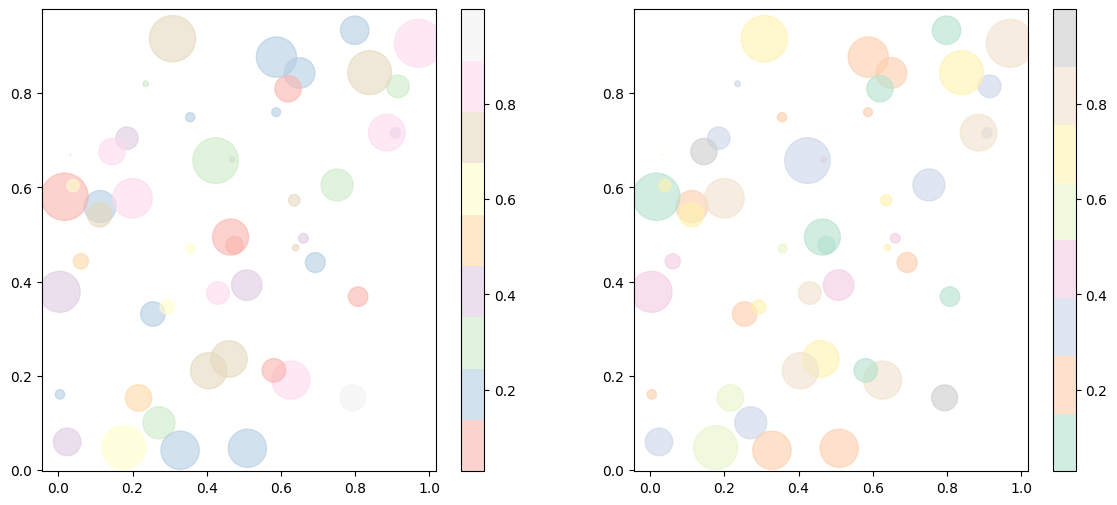

In [43]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(x,y,s=area,c=colors,alpha=0.6,cmap='Pastel1')
plt.colorbar()

ax2=fig.add_subplot(1,2,2)
plt.scatter(x,y,s=area,c=colors,alpha=0.6,cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms

In [44]:
values = np.random.randn(1000)

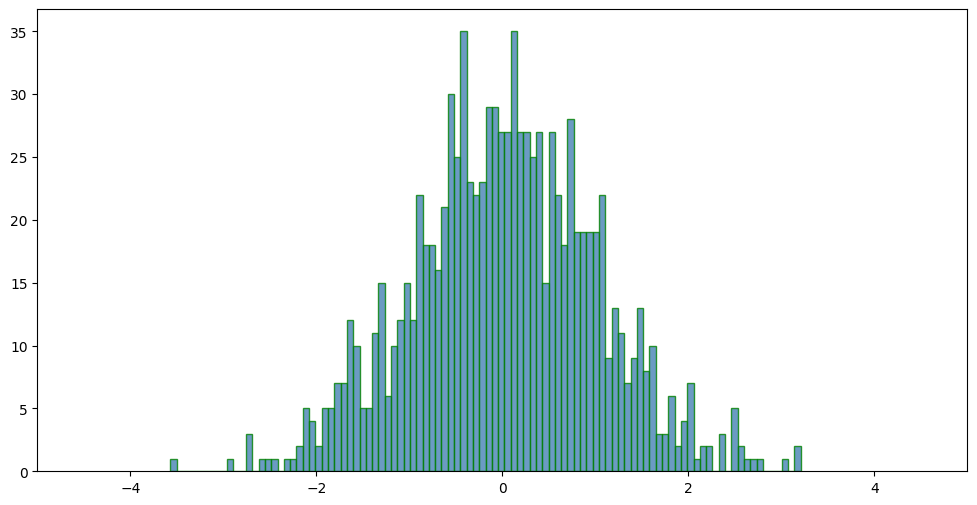

In [51]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8,
         histtype='bar', color='steelblue',
         edgecolor='green')
plt.xlim(xmin=-5,xmax=5)
plt.show()

In [53]:
fig.savefig('scatter.png')

### KDE

In [55]:
from scipy import stats

In [59]:
density = stats.gaussian_kde(values)
density

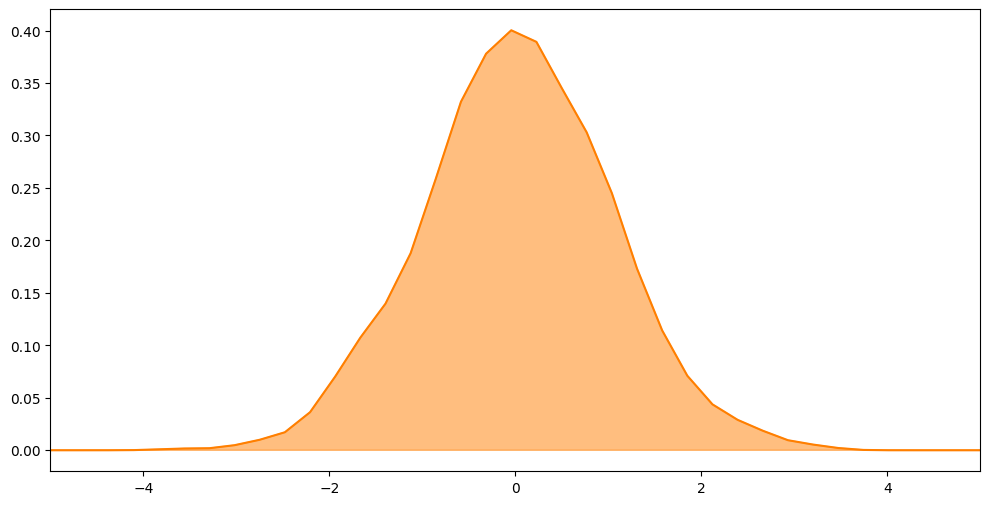

In [61]:
plt.subplots(figsize=(12,6))

values2=np.linspace(min(values)-10,max(values)+10,100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2,0,density(values2),alpha=0.5,color='#FF7F00')
plt.xlim(xmin=-5,xmax=5)

plt.show()

### Combine Plots

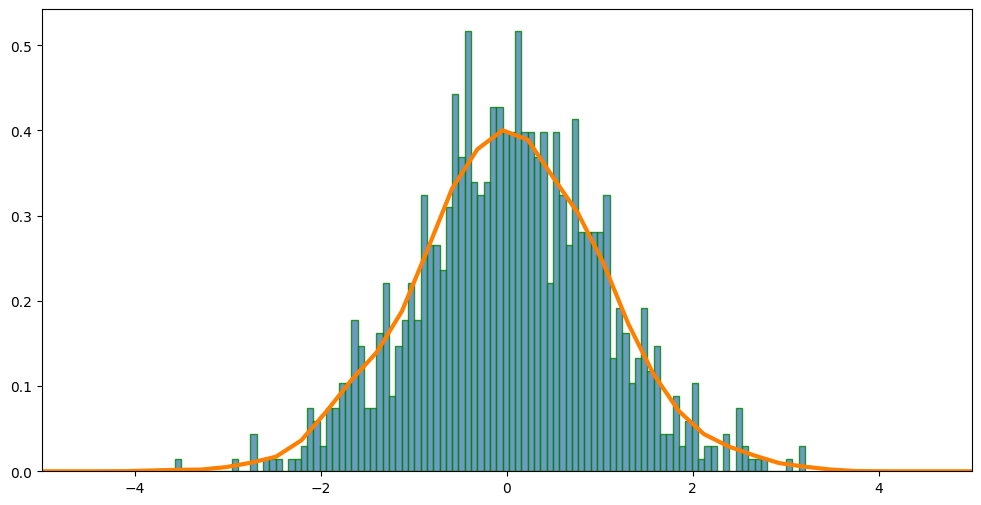

In [63]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8, density=1,
         histtype='bar', color='steelblue',
         edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5,xmax=5)

plt.show()

In [64]:
Y = np.random.rand(1,5)[0]
Y2 = np.random.rand(1,5)[0]

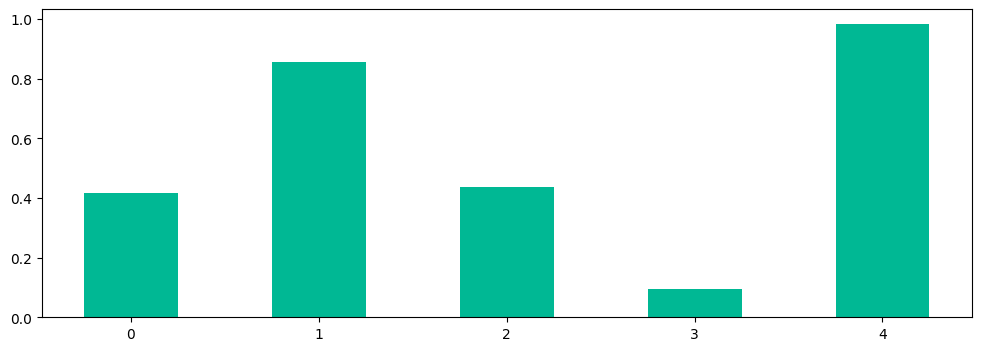

In [66]:
plt.figure(figsize=(12,4))

barWidth = 0.5
plt.bar(np.arange(len(Y)),Y,width=barWidth,color='#00b894')

plt.show()

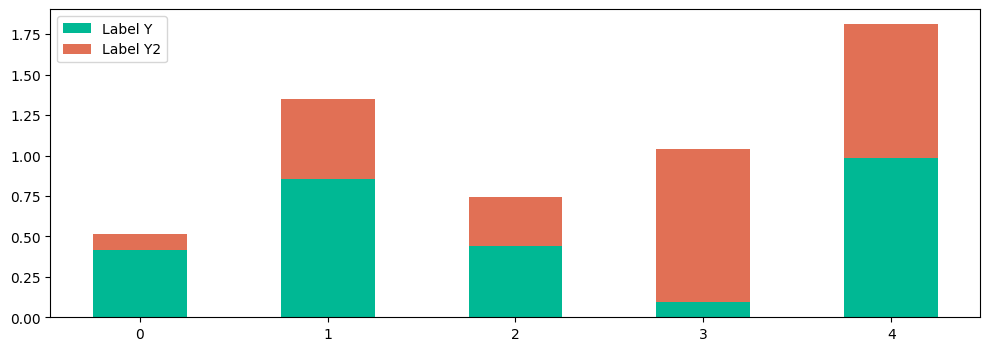

In [67]:
plt.figure(figsize=(12,4))

barWidth=0.5
plt.bar(np.arange(len(Y)),Y,width=barWidth,color='#00b894',label='Label Y')
plt.bar(np.arange(len(Y2)),Y2,width=barWidth,color='#e17055',bottom=Y,label='Label Y2')

plt.legend()
plt.show()

### Boxplots & Outlier detection

In [70]:
values = np.concatenate([np.random.randn(10), np.array([10,15,-10,-15])])

(array([1., 1., 0., 0., 3., 7., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

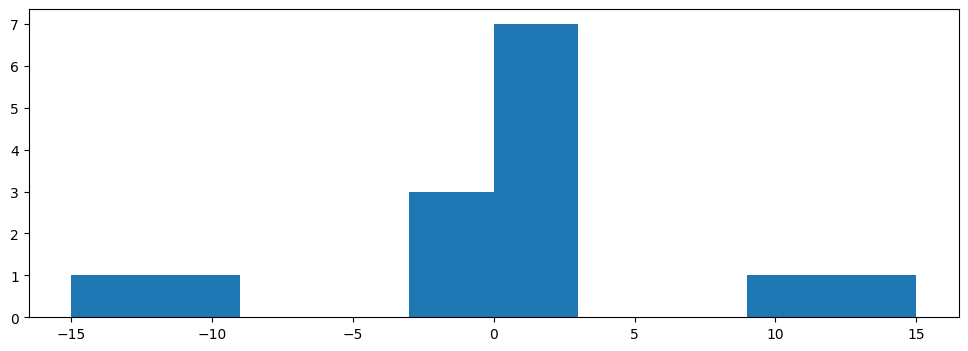

In [72]:
plt.figure(figsize=(12,4))
plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1502f4ccdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1502f5da840>,
 'boxes': [<matplotlib.lines.Line2D at 0x1502f4cd820>],
 'medians': [<matplotlib.lines.Line2D at 0x1502f5db3e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1502f5d8dd0>],
 'means': []}

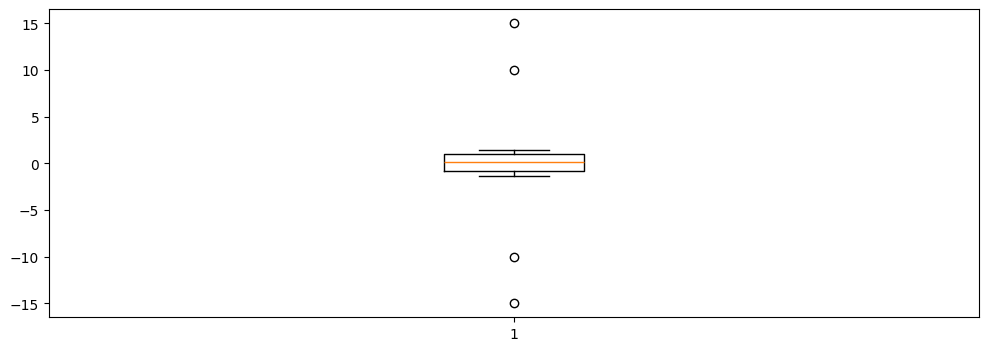

In [73]:
plt.figure(figsize=(12,4))

plt.boxplot(values)